[Table of Contents](table_of_contents.ipynb)

# Chapter 1.  The Unit Circle $S^1$: Kinematics, Control, and Estimation

## Definitions and Notation

We begin the study of Lie Groups and Lie Algebras by studying differential equations defined on the unit circle in $\mathbb{R}^2$.  Note that the unit circle in $\mathbb{R}^2$ is a one dimensional manifold embedded in the two dimensional Euclidean space $\mathbb{R}^2$. Two spaces are said to be isomorphic if there is a differentiable one-to-one mapping between elements in each space.  Note that $\mathbb{R}^2$ is isomorphic to the complex plane $\mathbb{C}$ by equating the $x$-axis with the real line and the $y$-axis with the imaginary line.  In $\mathbb{R}^2$ the unit circle is given by $S^1 = \{ (x_1, x_2)\in\mathbb{R}^2: x_1^2+x_2^2=1\}$.  In the complex plane, the unit circle is the set $S^1 = \{z\in\mathbb{C}: |z|=1\}$.  Since any complex number $z\in\mathbb{C}$ can be written in rectangular form as $z=a+jb$ and in polar form as $z=me^{j\theta}=m\cos\theta +jm\sin\theta$, the unit circle can be alternatively represented as $S^1 = \{e^{j\theta}\in\mathbb{C}: \theta\in(-\pi, pi]\}$.

Define the set of 2x2 matrices $\mathcal{M} = \left\{\begin{pmatrix} a & -b \\ b & a\end{pmatrix}: a,b \in \mathbb{R} \right\}\subset \mathbb{R}^{2\times 2}$.  It is clear that the complex plane $\mathbb{C}$ is isomorphic to $\mathcal{M}$ since for every complex number $z=a+jb$ there is unique element in $\mathcal{M}$, and visa versa.  It turns out that multiplying complex numbers is equivalent to matrix multiplication over $\mathcal{M}$. As can be seen from simple algebra:
\begin{align*}
(a+jb)(c+jd) &= (ac-bd) + j(bc+ad) \\
\begin{pmatrix} a & -b \\ b & a \end{pmatrix} \begin{pmatrix} c & -d \\ d & c \end{pmatrix} &= \begin{pmatrix} ac-bd & -(bc+ad) \\ (bc+ad) & ac-bd \end{pmatrix}
\end{align*}

In fact, define $I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}\subset\mathcal{M}$ and $J=\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}\subset\mathcal{M}$ and note that $I^2=I$, $IJ=JI=J$ and $J^2=-I$.  Therefore $I$ acts like the complex number $1$, and $J$ acts like the complex number $j=\sqrt{-1}$.  Any element of $\mathcal{M}$ can be written as $aI+bJ$ in the same way that any element of the complex plane $\mathbb{C}$ can be written as $a+jb$.


The unit circle embedded in the complex plane is given by the set $S^1=\{ z\in\mathbb{C}: |z|=1\}$.  Similarly, the unit circle embedded in the set of $2\times 2$ matrices $\mathbb{R}^{2\times 2}$ is given by $S^1=\{G\in\mathcal{M}: \det{G}=1\}$.  

For example, the point $x=(1/\sqrt{2}, 1/\sqrt{2})^\top$ represent a point on the unit circle in $\mathbb{R}^2$ that is equivalent to the representation $z=e^{j\frac{\pi}{4}}$ in $\mathbb{C}$, that is equivalent to the representation $G=\begin{pmatrix}\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ in $\mathbb{R}^{2\times 2}$.

Therefore, we can talk of embeddings 
\begin{align*}
\pi_1: S^1 &\rightarrow \mathbb{R}^2, \\
\pi_2: S^1 &\rightarrow \mathbb{C}, \\
\pi_3: S^1 &\rightarrow \mathbb{R}^{2\times 2}.
\end{align*}


A matrix $R$ is said to be orthgonal if $R^\top R = RR^\top = I$.  The set of $2\times 2$ orthogonal matrices is denoted $O(2)$.  Orthogonal matries can have determinant equal to $\pm 1$.  The set of orthogonal matrices with determinant equal to 1 is denoted $SO(2)$ and is the called the special orthogonal group.  It is fairly straight forward to show that $SO(2)=\{G\in\mathcal{M}: det(G)=1\}$ and is therefore isomorphic to $S^1$.

The following code establishes a class for $S^1$.  We will use matrices in $\mathbb{R}^{2\times 2}$ as the native representation for elements of $S^1$ and provide functions that convert between the representations.  Since $S^1$ is isomorphic to $SO(2)$ and since we will generalize $SO(3)$ later, the discussion that follows will focus on $SO(2)$.

In [39]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

class lie_group_SO2:
    # this class will be used to define operations on SO2
    def __init__(self, G=np.eye(2)):
        self.mat = G
    
    # generate a random element in SO2
    def gen_random_element(self):
        th = random.uniform(-np.pi, np.pi)
        self.mat = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
    
    # functions that convert between representations
    def vector(self):
        return self.mat[:,0]

    def complex(self):
        return self.mat[0,0] + self.mat[1,0]*1j   
    
    def magPhase(self):
        mag = np.sqrt(self.mat[0,0]**2 + self.mat[1,0]**2)
        phase = np.arctan2(self.mat[1,0], self.mat[0,0])
        return mag, phase
    

The following code tests these functions.

In [40]:
G1 = lie_group_SO2()
G1.gen_random_element()
print('G=', G1.mat)
x = G1.vector()
print('x=', x)
z = G1.complex()
print('z=', z)
mag, phase = G1.magPhase()
print('mag = ', mag, ', phase = ', 2*np.pi*phase, 'deg')

G= [[ 0.55832249 -0.82962401]
 [ 0.82962401  0.55832249]]
x= [0.55832249 0.82962401]
z= (0.5583224867623947+0.8296240116917154j)
mag =  1.0 , phase =  6.147681643184119 deg


In mathematics, a group is defined as a set of objects $\mathcal{G}$ that contains a unique element $I\in\mathcal{G}$ called the identity, and an operation $\cdot$ such that 
*  $G_1, G_2 \in \mathcal{G}$ implies that $G_1\cdot G_2 \in \mathcal{G}$,
*  For every $G\in\mathcal{G}$ there exists and element $H\in\mathcal{G}$ such that $G\cdot H = H\cdot G = I$.  $H$ is called the inverse of $G$ and will be denoted as $G^{-1}$.

The first item implies that $\mathcal{G}$ is closed under the $\cdot$ operation.  The second item implies that every element in $\mathcal{G}$ has an inverse.

For $S^1$, the $\cdot$ operator is defined differently depending on the space into which it is embedded.  For example, in $\mathbb{C}$, let $z_1=e^{j\theta_1}$ and $z_2=e^{j\theta^2}$, then clearly 
\begin{equation}
z = z_1 z_2 = e^{j\theta_1} e^{j\theta_2} = e^{j(\theta_1+\theta)}
\end{equation}
is an element of $S^1$, and if $z=1+j0$ is the identity, then the inverse operator is simply the complex conjugate since
\begin{equation}
z\bar{z} = e^{j\theta} e^{-j\theta} = e^{j(\theta-\theta)} = e^{j0} = 1.
\end{equation}

On the other hand, if $S^1$ is embedded in $\mathbb{R}^{2\times 2}$, and the identity is defined as the identity matrix, then the $\cdot$ operator is simply matrix multiplication since
\begin{align*}
G_1 G_2 &= \begin{pmatrix} \cos(\theta_1) & -\sin(\theta_1) \\ \sin(\theta_1) & \cos(\theta_1) \end{pmatrix}
\begin{pmatrix} \cos(\theta_2) & -\sin(\theta_2) \\ \sin(\theta_2) & \cos(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) & -\cos(\theta_1)\sin(\theta_2)-\sin(\theta_1)\cos(\theta_2) \\ \cos(\theta_1)\sin(\theta_2)+\sin(\theta_1)\cos(\theta_2) & \cos(\theta_1)\cos(\theta_1)-\sin(\theta_1)\sin(\theta_2) \end{pmatrix} \\
&= \begin{pmatrix} \cos(\theta_1+\theta_2) & -\sin(\theta_1+\theta_2) \\ \sin(\theta_1+\theta_2) & \cos(\theta_1+\theta_2) \end{pmatrix}
\end{align*}
and the inverse of $G\in\mathcal{G}$ is given by the matrix inverse since $GG^{-1}=I$.  

It should be clear that if $S^1$ is embedded in $\mathbb{R}^2$ the $\cdot$ and inverse operators are much more complex.  Since operations on the group $S^1$ can be carried out with matrix operations, the most convenient representation will be in $\mathbb{R}^{2\times 2}$.   (Actually, $\mathbb{C}$ is convenient for $S^1$ but does not extend to other groups, whereas matrix operations will extend to other groups useful in robotics.)

We can expand the python class to include an identity, the dot and the inverse operator.

In [42]:
class lie_group_SO2(lie_group_SO2):
    
    # compose (multiply) two elements in SO2
    def dot(self, G1):
        return np.dot(self.mat, G1)
    
    # return the identity element
    def identity():
        return np.eye(2)

    # return the inverse of an element in SO(2)
    def inverse(self):
        return self.mat.T

The following lines test the code.

In [43]:
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
print('G^{-1}=', G.inverse())
G1 = lie_group_SO2()
G1.gen_random_element()
print('G*G1=', G.dot(G1.mat))

G= [[ 0.9967954   0.07999331]
 [-0.07999331  0.9967954 ]]
G^{-1}= [[ 0.9967954  -0.07999331]
 [ 0.07999331  0.9967954 ]]
G*G1= [[-0.93025175  0.36692191]
 [-0.36692191 -0.93025175]]


## Kinematics

From the above discussion, it is clear that $G\in SO(2)$ implies that $G=\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$.  Suppose now that $\theta\equiv\theta(t)$ is a function of time, then
\begin{equation*}
G(t) = \begin{pmatrix} \cos\theta(t) & -\sin\theta(t) \\ \sin\theta(t) & \cos\theta(t)\end{pmatrix}.
\end{equation*}

Taking the derivative with respect to time we get
\begin{align}
\dot{G} &= \begin{pmatrix} -\dot{\theta}\sin\theta & -\dot{\theta}\cos\theta \\ \dot{\theta}\cos\theta & -\dot{\theta}\sin\theta \end{pmatrix} \\
&= \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} 
   \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix} \\
&= G\dot{\theta}^\times,
\end{align}
where we define
\begin{equation*}
\dot{\theta}^\times = \begin{pmatrix} 0 & -\dot{\theta} \\ \dot{\theta} & 0 \end{pmatrix}.
\end{equation*}

The kinematic equation of motion on $SO(2)$ is therefore given by $\dot{G} = G\dot{\theta}^\times$

Note that in $\mathbb{R}^2$, the tangent to the unit circle at the point $(1,0)$ is a vertical line given by $\ell = \{\sigma\begin{pmatrix} 0 \\ 1\end{pmatrix}: \sigma\in\mathbb{R}\}$.

(-3, 3, -3, 3)

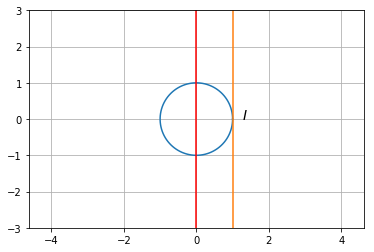

In [72]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
plt.plot(lie_alg[:,0], lie_alg[:,1], color='red')
plt.text(1.25, 0, '$I$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

The tangent plane is shown in orange and the Lie algebra, which is a subspace of $\mathbb{R}^2$ is shown in red.  When $G$ is not the identity, then the tangent plane and its tangent space is shown in the plot below.  Note that the tangent space is a rotated (transformed) version of the Lie algebra.

(-3, 3, -3, 3)

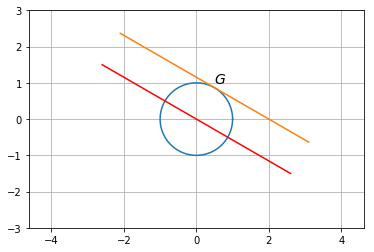

In [76]:
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
S = 3
th = 60*np.pi/180.
G = np.array([[np.cos(th), -np.sin(th)],[np.sin(th), np.cos(th)]])
tangent_plane = np.column_stack((np.ones(100), np.linspace(-S, S, 100))) 
tangent_plane = np.dot(G, tangent_plane.T).T
plt.plot(tangent_plane[:,0], tangent_plane[:,1])
lie_alg = np.column_stack((0.*np.ones(100), np.linspace(-S, S, 100))) 
tangent_space = np.dot(G, lie_alg.T).T
plt.plot(tangent_space[:,0], tangent_space[:,1], color='red')
plt.text(0.5, 1.0, '$G$', fontsize=14)
plt.axis('equal')
plt.grid(True)
plt.axis((-S, S, -S, S))

In the complex plane $\mathbb{C}$, the tangent to $S^1$ at the identity $z=1+0j$ is the vertical line $\ell = \{ \sigma j: \sigma\in\mathbb{R}\}$.  In the set of $2\times 2$ matrices, the tangent to $S^1=SO(2)$ at the identity $G=I$ is the vertical line $\ell = \{\sigma\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}: \sigma\in\mathbb{R}\} = \{\sigma J: \sigma\in\mathbb{R}\}$.  


The tangent space at the identity $G=I$ is called the Lie Algebra.  

The Lie algebra of $SO(2)$ will be denoted ${\mathfrak so}(2)$ and in $\mathbb{R}^{2\times 2}$ is given by
\begin{equation}
{\mathfrak so}(2) = \{ \sigma J: \sigma\in\mathbb{R}\}
\end{equation}

In $\mathbb{R}^{2\times 2}$, the Lie bracket is the standard matrix Lie bracket defined as $[A,B]=AB-BA$, where $A,B\in so(2)$.  Note that since $A,B\in so(2)$ that we can write $A=aJ$ and $B=bJ$ and therefore
\begin{align*}
[A,B] &= AB - BA \\
      &= (aJ)(bJ)-(bJ)(aJ) \\
      &= (-abI) - (baI)\\
      &= 0.
\end{align*}
Therefore, the Lie bracket on $so(2)$ is always zeros.  Lie groups whose Lie bracket is always zero are called Abelian Lie groups.

Note that the tangent space at an element that is not equal to identity, is just a transformed version of the Lie algebra ${\mathfrak so}(2)$.  Since $\dot{G}=G\omega^{\times}$, the tangent space at G is $G\omega^{\times}=GJ\omega$.  

### Exponential and Logarithmic Maps
We have shown that the kinematic equation of motion on $SO(2)$ can be written as 
\begin{equation}
\dot{G} = G\omega^\times.
\end{equation}
Rearranging we get $\dot{G}-G\omega^\times=0$.  Multiplying both sides of the equation by the integrating factor $e^{-\omega^\times}$ gives
\begin{equation}
(\dot{G} - G\omega^\times)e^{-\omega^\times} = 0,
\end{equation}
which implies that 
\begin{equation}
\frac{d}{dt}Ge^{-\omega^\times} = 0.
\end{equation}
Integrating both sides from $0$ to $t$ gives
\begin{equation}
G(t) = G(0)e^{\omega^\times t}.
\end{equation}
Since $\omega^\times t = J(\omega t)$, the exponential function maps the Lie algebra ${\mathfrak so}(2)$ to the Lie group $SO(2)$.  

For $SO(2)$ there is a simple formula for the exponential map $e^{J\sigma}$ since $J^2=-I$ we have
\begin{align*}
e^{J\sigma} &= I + J\sigma + \frac{1}{2!}J^2\sigma^2 + \frac{1}{3!}J^3\sigma^3 + \frac{1}{4!}J^4\sigma^4 + \cdots \\
&=(1-\frac{1}{2!}\sigma^2 + \frac{1}{4!}\sigma^4 + \cdots)I + (\sigma - \frac{1}{3!}\sigma^3 + \frac{1}{5!}\sigma^5+\cdots)J \\
&=\cos\sigma I + \sin\sigma J \\
&=\begin{pmatrix}\cos\sigma & -\sin\sigma \\ \sin\sigma & \cos\sigma \end{pmatrix}.
\end{align*}
Therefore the map $exp: {\mathfrak so}(2)\rightarrow SO(2)$ is periodic and is not one-to-one.

On the other hand, the logarithm maps the Lie group to the Lie algebra as $\log:SO(2)\rightarrow {\mathfrak so}(2)$ and is defined as
\begin{equation}
\log\begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix} = (\theta + 2\pi n)J.
\end{equation}
Alternatively, we could write
\begin{equation}
\log(G) = (\vartheta + 2\pi n)J, \quad \text{where} \quad \vartheta = \tan^{-1}\left(\frac{G_{21}}{G_{11}}\right).
\end{equation}
We can add Python methods implement the logarithmic and exponential maps.



In [62]:
class lie_group_SO2(lie_group_SO2):
    
    # Exponential of g in so(2)
    def exp(self, g):
        # check to see of g is in so(2)
        if np.linalg.norm(g+g.T)<.000001:
            th = g[1,0]
            G = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])
            return G
        else:
            print('g is not in so(2)')
    
    # log of G in SO(2)
    def log(self):
        # check to see if G is in SO(2)
        if np.linalg.norm(np.dot(self.mat, self.mat.T)-np.eye(2))<.000001:
            varphi = np.arctan2(self.mat[1,0],self.mat[0,0])
            g = np.array([[0, -varphi], [varphi, 0]])
            return g
        else:
            print('G is not in SO(2)')


In [67]:
# generate a random element in SO(2)
G = lie_group_SO2()
G.gen_random_element()
print('G=', G.mat)
# map to so(2) through the log
g = G.log()
print('g=', g)
# map back to SO(2) through the exp
H = G.exp(g)
print('H=', H)



G= [[ 0.55785832  0.8299362 ]
 [-0.8299362   0.55785832]]
g= [[ 0.         0.9789933]
 [-0.9789933  0.       ]]
H= [[ 0.55785832  0.8299362 ]
 [-0.8299362   0.55785832]]


## Optimization (Gradient Descent) on $S^1$

??

## Differential Equation Solvers

Parker

## Control

Jerel


## Estimation

Devon